 # **FBA of mitochondrial metabolism**

**This tutorial**

    1 - loads and inspects the model
    2 - performs FBA optimising ATP using unconstrained O2 uptake = 'oxygen_available_solution'
    3 - performs FBA optimising ATP whilst constraining O2 uptake = 'hypoxic'
    4 - maps fluxes from 'oxygen_available', and 'hypoxic' simulations using ESCHER
   

**First we import the required packages**

In [59]:
import cobra
import sys
import matplotlib.pyplot as plt
import escher
from os.path import join
from cobra.util.solver import linear_reaction_coefficients
from escher import Builder

**Then set the path to load and read the model**

In [7]:
data_dir= "/home/stephen/Documents/research/FBA_mito/FBA/models"

In [8]:
model= cobra.io.read_sbml_model(join(data_dir, "mitoCore_SBML3.xml"))

No objective coefficients in model. Unclear what should be optimized


The above output reminds us we need to set an objective function that will be optimised using FBA

**Model inspection**

In [9]:
#provide a summary of the model
model

<Model S1SBMLmodel at 0x7f352436b590>

In [10]:
print(len(model.genes))

391


In [29]:
#printing specific reaction types
print(model.exchanges)
#print("demands", model.demands)
#print("sinks", model.sinks)
#print(len(model.exchanges))

[<Reaction EX_2hb_e at 0x7f3523f74390>, <Reaction EX_ac_e at 0x7f3523f743d0>, <Reaction EX_acac_e at 0x7f3523f74550>, <Reaction EX_akg_e at 0x7f3523f74610>, <Reaction EX_ala_B_e at 0x7f3523f74750>, <Reaction EX_ala_L_e at 0x7f3523f74910>, <Reaction EX_arg_L_e at 0x7f3523f74ad0>, <Reaction EX_argsuc_e at 0x7f3523f74d50>, <Reaction EX_asn_L_e at 0x7f3523f74e90>, <Reaction EX_asp_L_e at 0x7f3523f74cd0>, <Reaction EX_bhb_e at 0x7f3523f81250>, <Reaction EX_bilirub_e at 0x7f3523f81450>, <Reaction EX_biomass_e at 0x7f3523f81590>, <Reaction EX_but_e at 0x7f3523f81750>, <Reaction EX_chol_e at 0x7f3523f81910>, <Reaction EX_cit_e at 0x7f3523f81ad0>, <Reaction EX_citr_L_e at 0x7f3523f81c90>, <Reaction EX_co_e at 0x7f3523f81e50>, <Reaction EX_co2_e at 0x7f3523f88050>, <Reaction EX_creat_e at 0x7f3523f88210>, <Reaction EX_cyan_e at 0x7f3523f883d0>, <Reaction EX_cys_L_e at 0x7f3523f88590>, <Reaction EX_etoh_e at 0x7f3523f88750>, <Reaction EX_fe2_e at 0x7f3523f88910>, <Reaction EX_for_e at 0x7f3523f88

In [16]:
#printing meabolite producing reactions by metabolite ID
model.metabolites.atp_m.summary()

In [9]:
print(len(model.reactions))

555


In [6]:
#access reaction by reaction_identifier, if reactions_id is known
model.reactions.HEX1

<Reaction HEX1 at 0x7f150f73fbd0>

The gene reaction rule is a boolean representation of the gene requirements for
this reaction to be active as described in Schellenberger et al 2011 Nature Protocols
6(9):1290-307.

In [31]:
model.reactions.HEX1.gene_reaction_rule

'ENSG00000156515 or ENSG00000159399 or ENSG00000160883 or ENSG00000106633'

In [32]:
# Iterate through the the objects in the model
print("Reactions")
print("---------")
for x in model.reactions:
    print("%s : %s" % (x.id, x.reaction))
print("")
print("Metabolites")
print("-----------")
for x in model.metabolites:
    print("%s : %s" % (x.id, x.formula))
    print("")
    print("Genes")
    print("-----")
for x in model.genes:
    associated_ids = (i.id for i in x.reactions)
    print("%s is associated with reactions: %s" %
        (x.id, "{" + ", ".join(associated_ids) + "}"))

Reactions
---------
EX_2hb_e : 2hb_e <=> 
EX_ac_e : ac_e <=> 
EX_acac_e : acac_e <=> 
EX_akg_e : akg_e <=> 
EX_ala_B_e : ala_B_e <=> 
EX_ala_L_e : ala_L_e <=> 
EX_arg_L_e : arg_L_e <=> 
EX_argsuc_e : argsuc_e <=> 
EX_asn_L_e : asn_L_e <=> 
EX_asp_L_e : asp_L_e <=> 
EX_bhb_e : bhb_e <=> 
EX_bilirub_e : bilirub_e <=> 
EX_biomass_e : biomass_e <=> 
EX_but_e : but_e <=> 
EX_chol_e : chol_e <=> 
EX_cit_e : cit_e <=> 
EX_citr_L_e : citr_L_e <=> 
EX_co_e : co_e <=> 
EX_co2_e : co2_e <=> 
EX_creat_e : creat_e <=> 
EX_cyan_e : cyan_e <=> 
EX_cys_L_e : cys_L_e <=> 
EX_etoh_e : etoh_e <=> 
EX_fe2_e : fe2_e <=> 
EX_for_e : for_e <=> 
EX_fum_e : fum_e <=> 
EX_glc_D_e : glc_D_e <=> 
EX_gln_L_e : gln_L_e <=> 
EX_glu_L_e : glu_L_e <=> 
EX_gly_e : gly_e <=> 
EX_glyc_e : glyc_e <=> 
EX_h_e : h_e <=> 
EX_h2o_e : h2o_e <=> 
EX_HC00250_e : HC00250_e <=> 
EX_hco3_e : hco3_e <=> 
EX_hdca_e : hdca_e <=> 
EX_his_L_e : his_L_e <=> 
EX_icit_e : icit_e <=> 
EX_ile_L_e : ile_L_e <=> 
EX_lac_L_e : lac_L_e <=> 
EX_l

-----
nadp_c : C21H25N7O17P3

Genes
-----
nadp_m : C21H25N7O17P3

Genes
-----
nadph_c : C21H26N7O17P3

Genes
-----
nadph_m : C21H26N7O17P3

Genes
-----
nh4_c : H4N

Genes
-----
nh4_e : H4N

Genes
-----
nh4_m : H4N

Genes
-----
no_c : NO

Genes
-----
no_e : NO

Genes
-----
nwharg_c : C6H15N4O3

Genes
-----
o2_c : O2

Genes
-----
o2_e : O2

Genes
-----
o2_m : O2

Genes
-----
o2s_m : O2

Genes
-----
oaa_c : C4H2O5

Genes
-----
oaa_e : C4H2O5

Genes
-----
oaa_m : C4H2O5

Genes
-----
occoa_m : C29H46N7O17P3S

Genes
-----
orn_c : C5H13N2O2

Genes
-----
orn_m : C5H13N2O2

Genes
-----
pa_hs_m : C5H7O8PR2

Genes
-----
pchol_hs_c : C10H18NO8PR2

Genes
-----
pchol_hs_e : C10H18NO8PR2

Genes
-----
pchol_hs_m : C10H18NO8PR2

Genes
-----
pcreat_c : C4H9N3O5P

Genes
-----
pcreat_e : C4H9N3O5P

Genes
-----
pcreat_m : C4H9N3O5P

Genes
-----
pe_hs_c : C7H12NO8PR2

Genes
-----
pe_hs_e : C7H12NO8PR2

Genes
-----
pe_hs_m : C7H12NO8PR2

Genes
-----
pep_c : C3H2O6P

Genes
-----
pep_m : C3H2O6P

Genes
-----
p

if reaction_id is unknown we can find reaction ID from reaction abbreiation and its corresponding index this way...

In [11]:
def findIndex(function):
    ''' Return the index of a specific enzyme '''
    # counter of index
    index = 0
    # for each reaction present in the model
    for reaction in model.reactions:
        # convert reaction in a string and split it
        reaction = str(reaction).split()
        # get the enzyme and remove the ':' at the end
        reaction = reaction[0][:-1]
        # comparaison between both
        if function == reaction:
            # show the index and stop the process
            return print(function, " : ", index)
        # increment the index position
        index += 1

# There is some examples:
findIndex("EX_glc_D_e")
#findIndex("OF_ATP_MitoCore")
findIndex("EX_o2_e")
#findIndex("CV_MitoCore")
#findIndex("ACACT10m")

EX_glc_D_e  :  26
EX_o2_e  :  49


In [12]:
#access reaction by reaction index
model.reactions[107].metabolites

{<Metabolite h_m at 0x7f30821d0050>: -1.0,
 <Metabolite PMF_m at 0x7f30821d04d0>: -3.996,
 <Metabolite nadh_m at 0x7f30821ebd50>: -1.0,
 <Metabolite q10_m at 0x7f308218cb10>: -0.999,
 <Metabolite o2_m at 0x7f30821eef10>: -0.002,
 <Metabolite PMF_c at 0x7f30821d02d0>: 3.996,
 <Metabolite nad_m at 0x7f30821e9f90>: 1.0,
 <Metabolite q10h2_m at 0x7f3082200ed0>: 0.999,
 <Metabolite o2s_m at 0x7f30821f2f50>: 0.002}

**Performing FBA to optimise ATP synthesis**

In [33]:
#setting the objective function to the reaction wanting to optimise
model.objective = model.reactions[70]

In [36]:
#to check that the objective function is correctly set
linear_reaction_coefficients(model)

{<Reaction OF_ATP_MitoCore at 0x7f3523fa7f10>: 1.0}

In [37]:
print(model.objective.expression)

1.0*OF_ATP_MitoCore - 1.0*OF_ATP_MitoCore_reverse_653d9


In [38]:
print(model.objective.direction)

max


In [39]:
#check which solver is being used
model.solver

In [65]:
#the following command performs FBA and saves the flux results specific to this optimisation as 'oxygen_available_solution'
oxygen_available_solution = model.optimize()
#print(oxygen_available_solution)
print(type(oxygen_available_solution))

<class 'cobra.core.solution.Solution'>


The **model.optimize()** function will return a **solution object** with the following attributes

    objective_value - the objective value
    status - the status from LP solver
    fluxes - a pandas series with flux indexed by reaction identifier
            shadow_prices - a pandas series with shadow price indexed by metabolite identifier

In [41]:
model.summary()

In [42]:
#access the objective value
oxygen_available_solution.objective_value

100.89230387215613

In [43]:
#access the objective value
oxygen_available_solution.status

'optimal'

In [22]:
#access fluxes
oxygen_available_solution.fluxes

EX_2hb_e      0.000
EX_ac_e       0.000
EX_acac_e    -0.114
EX_akg_e      0.000
EX_ala_B_e    0.000
              ...  
COt           0.000
NOt           0.000
PCHOLHSTDe    0.000
PSt3          0.000
PEt           0.000
Name: fluxes, Length: 555, dtype: float64

In [23]:
#accessing fluxes by index - oxygen uptake = 49th index
oxygen_available_solution.fluxes[49]

-19.8

In [25]:
#CheckATPsynthesis flux and direction
oxygen_available_solution.fluxes[111] #93.3932603938952 -> 7 PMF_c + adp_m + h_m + pi_m <=> 2.7 PMF_m + atp_m + h2o_m

93.3932603938952

In [26]:
#check glucose uptake
oxygen_available_solution.fluxes[485]

0.9

In [27]:
#pyruvate transport to mitochondria PYRt2m  :  440
oxygen_available_solution.fluxes[440]

2.490000000000033

In [28]:
#accessing fluxes by reaction_id
oxygen_available_solution.fluxes.EX_o2_e 

-19.8

**Constraining Oxygen uptake for hypoxic conditions and then predict how O2 uptake effects maximum ATP production**

In [35]:
#first, verify the correct reactions to constrain - interested in O2 exchange and ATP production reactions
model.reactions[49]

<Reaction EX_o2_e at 0x7f3082168b10>

In [36]:
model.reactions[70]

<Reaction OF_ATP_MitoCore at 0x7f30820f9f90>

In [37]:
#hypoxia should limit ATP maxima - so lets constrain oxygen uptake to zero = hypoxia
model.reactions[49].bounds = (0,0)

In [38]:
model.reactions[49].bounds

(0, 0)

In [39]:
#to check that the objective function is correctly set
linear_reaction_coefficients(model)

{<Reaction OF_ATP_MitoCore at 0x7f30820f9f90>: 1.0}

In [47]:
hypoxia = model.optimize()
print(hypoxia)

<Solution 100.892 at 0x7f351ced9590>


so when O2 is removed from the system, ATP has been reduced to 1.85 units

Briefly, -19.8 uptake produces ~ 100 units of ATP; 0 oxygen transport = 1.85 units ATP flux

Let's see how robust the model is to Oxygen uptake....

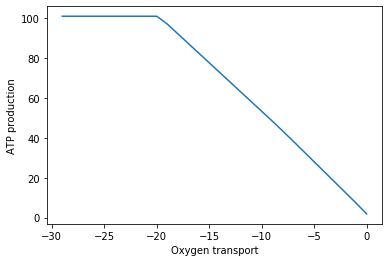

In [48]:
oxygen_flux = [] #model.reaction[49]
ATP_production = []#model.reaction[70]


for i in range(0,30,1): 
	model.reactions[49].lower_bound = - i
	model.reactions[49].upper_bound = i
	solution = model.optimize()         
	ATP_production.append(solution.objective_value)
	oxygen_flux.append(model.reactions[49].lower_bound)

#X_data_plot = (0,30,1) #a vector that contains the same information as 

plt.plot(oxygen_flux, ATP_production)

plt.ylabel('ATP production')
plt.xlabel('Oxygen transport')
plt.show()

[0, -1, -2, -3, -4, -5, -6, -7, -8, -9, -10, -11, -12, -13, -14, -15, -16, -17, -18, -19, -20, -21, -22, -23, -24, -25, -26, -27, -28, -29]


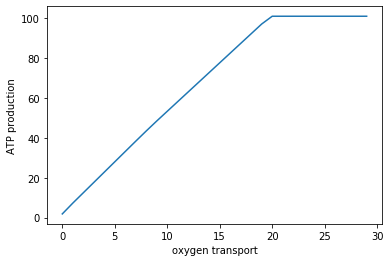

In [49]:
#to improve clarty of the graph, important to invert X axis, and remove the negative - Exchange reactions are modelled
#as negative uptake, so -30 means -30 uptake into mitochondria.

print(oxygen_flux)# a list of 30 decremental values from 30 - 0
#print(len(oxygen_flux))
#print(len(ATP_production))

new_O2_transport = range(0,30,1)

plt.plot(new_O2_transport, ATP_production)

plt.ylabel('ATP production')
plt.xlabel('oxygen transport')
plt.show()



By convention, exchange reactions are written as export reactions (e.g. ‘glc[e] <==>’), so import of a metabolite is expressed as a negative flux. The above simulation shows that Maximal ATP production = 100.9 mmol gDW, is only achiavable when oxygen uptake is set to 30. Decreases in oxygen availability decrease overall ATP production

**Mapping fluxes using ESCHER**

**hypoxia results in reduced ATP production than compared to "oxygen_avalability" simlations - lets map the fluxes to metbaolic maps to expalin changes in metabolism to describe this prediction.**


In [50]:
escher.list_available_maps() #prints map names

[{'organism': 'Saccharomyces cerevisiae',
  'map_name': 'iMM904.Central carbon metabolism'},
 {'organism': 'Homo sapiens',
  'map_name': 'RECON1.Inositol retinol metabolism'},
 {'organism': 'Homo sapiens', 'map_name': 'RECON1.Glycolysis TCA PPP'},
 {'organism': 'Homo sapiens', 'map_name': 'RECON1.Tryptophan metabolism'},
 {'organism': 'Homo sapiens', 'map_name': 'RECON1.Carbohydrate metabolism'},
 {'organism': 'Homo sapiens',
  'map_name': 'RECON1.Amino acid metabolism (partial)'},
 {'organism': 'Escherichia coli', 'map_name': 'iJO1366.Nucleotide metabolism'},
 {'organism': 'Escherichia coli',
  'map_name': 'iJO1366.Fatty acid biosynthesis (saturated)'},
 {'organism': 'Escherichia coli',
  'map_name': 'iJO1366.Nucleotide and histidine biosynthesis'},
 {'organism': 'Escherichia coli', 'map_name': 'e_coli_core.Core metabolism'},
 {'organism': 'Escherichia coli', 'map_name': 'iJO1366.Central metabolism'},
 {'organism': 'Escherichia coli',
  'map_name': 'iJO1366.Fatty acid beta-oxidation'}

In [57]:
escher.list_available_models()

[{'organism': 'Saccharomyces cerevisiae', 'model_name': 'iMM904'},
 {'organism': 'Homo sapiens', 'model_name': 'RECON1'},
 {'organism': 'Escherichia coli', 'model_name': 'e_coli_core'},
 {'organism': 'Escherichia coli', 'model_name': 'iJO1366'}]

In [67]:
#A function to load escher metabolc map, load a model and project the flux distubtions
def escherModelization(metabolicMap, model, fluxesList):
    #escher visulasation of fluxes - hypoxia fluxes
    builder = Builder(
        map_name=metabolicMap,
        model_name=model
    )

    #builder.model = model
    #solution = builder.model.optimize() #t
    builder.reaction_data = fluxesList.fluxes

    return builder 




escherModelization('RECON1.Glycolysis TCA PPP', 'RECON1', hypoxia) 

Builder(reaction_data={'EX_2hb_e': 0.0, 'EX_ac_e': 0.0, 'EX_acac_e': -0.114, 'EX_akg_e': 0.0, 'EX_ala_B_e': 0.…

In [62]:
escherModelization('RECON1.Glycolysis TCA PPP', 'RECON1', oxygen_available_solution) 

Builder(reaction_data={'EX_2hb_e': 0.0, 'EX_ac_e': 0.0, 'EX_acac_e': -0.114, 'EX_akg_e': 0.0, 'EX_ala_B_e': 0.…